In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

file_path = '/kaggle/input/cryptocurrency-historical-prices-coingecko/bitcoin.csv'

#   **<span style> 1. Load Bitcoin data </span>**

In [2]:
dataset = pd.read_csv(file_path)
dataset.head()

,date,price,total_volume,market_cap,coin_name
0,2015-01-01 00:00:00.000,313.992,4.699936e+07,4.293958e+09,bitcoin
1,2015-01-02 00:00:00.000,314.446,3.885591e+07,4.301448e+09,bitcoin
2,2015-01-03 00:00:00.000,286.572,1.187789e+08,3.921358e+09,bitcoin
3,2015-01-04 00:00:00.000,260.936,2.055001e+08,3.571640e+09,bitcoin
4,2015-01-05 00:00:00.000,273.220,1.550381e+08,3.740880e+09,bitcoin


In [3]:
dataset.describe()

,price,total_volume,market_cap
count,2903.000000,2.903000e+03,2.902000e+03
mean,13303.644712,1.693696e+10,2.462377e+11
std,16368.268775,2.324151e+10,3.096544e+11
min,172.147900,1.823845e+07,2.362640e+09
25%,843.838150,1.002153e+09,1.345601e+10
50%,7309.689244,5.969709e+09,1.295735e+11
75%,17769.365132,2.753158e+10,3.291796e+11
max,67617.015545,4.293082e+11,1.278798e+12


#   **<span>2.Bitcoin Data </span>**

## **<span>2.1 Check any null values present </span>**

In [4]:
dataset.isnull().sum()

date            0
price           0
total_volume    0
market_cap      1
coin_name       0
dtype: int64

##  **<span>2.2 Plotting Few price data </span>**

In [6]:
import matplotlib.pyplot as plt
start_date = pd.to_datetime(dataset.date[0])
end_date = pd.to_datetime(dataset.date.values[-1])
dataset['date'] = pd.to_datetime(dataset['date'])

In [7]:
dataset.tail()

,date,price,total_volume,market_cap,coin_name
2898,2022-12-09,17235.014158,2.267403e+10,3.313899e+11,bitcoin
2899,2022-12-10,17149.824204,2.317983e+10,3.297568e+11,bitcoin
2900,2022-12-11,17125.364928,1.423437e+10,3.292832e+11,bitcoin
2901,2022-12-12,17101.038020,1.568112e+10,3.288688e+11,bitcoin
2902,2022-12-13,17179.596038,2.163383e+10,3.307157e+11,bitcoin


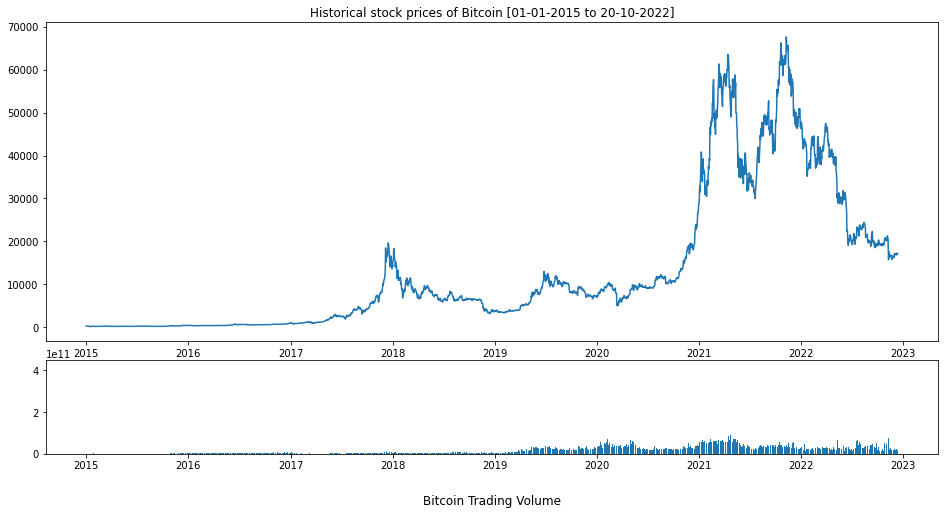

In [8]:
top_plt = plt.subplot2grid((5,4), (0, 0), rowspan=3, colspan=4)
top_plt.plot(dataset.date, dataset["price"])
plt.title('Historical stock prices of Bitcoin [01-01-2015 to 20-10-2022]')
bottom_plt = plt.subplot2grid((5,4), (3,0), rowspan=1, colspan=4)
bottom_plt.bar(dataset.date, dataset['total_volume'])
plt.title('\nBitcoin Trading Volume', y=-0.60)
plt.gcf().set_size_inches(16,10)

In [9]:
dataset.describe()

,price,total_volume,market_cap
count,2903.000000,2.903000e+03,2.902000e+03
mean,13303.644712,1.693696e+10,2.462377e+11
std,16368.268775,2.324151e+10,3.096544e+11
min,172.147900,1.823845e+07,2.362640e+09
25%,843.838150,1.002153e+09,1.345601e+10
50%,7309.689244,5.969709e+09,1.295735e+11
75%,17769.365132,2.753158e+10,3.291796e+11
max,67617.015545,4.293082e+11,1.278798e+12


## **<span>2.3 Check datatype of Adj Close price </span>**

In [10]:
dataset['price'].dtype

dtype('float64')

##  **<span>2.4 Find Correlation  </span>**

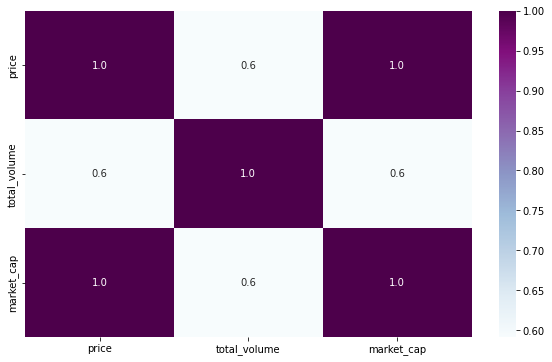

In [11]:
import seaborn as sns
# plotting correlation heatmap
plt.figure(figsize = (10, 6))
dataplot = sns.heatmap(dataset[['price', 'total_volume', 'market_cap']].corr(), cmap="BuPu", annot=True, 
                      fmt=".1f")
plt.show()

In [12]:
dataset2 = dataset[['price', 'total_volume']]
dataset2.head()

,price,total_volume
0,313.992,4.699936e+07
1,314.446,3.885591e+07
2,286.572,1.187789e+08
3,260.936,2.055001e+08
4,273.220,1.550381e+08


##  **<span> 2.5.1 - ADF Test  </span>** 



In [13]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(dataset2.price.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.6959245009949449
p-value: 0.4332135104793123
Critial Values:
   1%, -3.432627366129768
Critial Values:
   5%, -2.862546185823105
Critial Values:
   10%, -2.567305621914905


## **<span> 2.5.2 - Let's apply log transformation to the data and test again </span>** 

In [14]:
from numpy import log

result = adfuller((log(dataset2.price.values)), autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.3944552232828693
p-value: 0.5849314484383357
Critial Values:
   1%, -3.432606151575025
Critial Values:
   5%, -2.8625368163579603
Critial Values:
   10%, -2.567300633673491


In [15]:
from statsmodels.tsa.stattools import kpss

result = kpss(dataset2['price'].values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}');


KPSS Statistic: 5.734798
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:2019: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


In [17]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

#  **<span> 5. Artificial Neural Network - Bitcoin price forecasting  </span>**



## **<span> 5.1 Load Data - "price" data  </span>**

In [18]:
data = dataset2['price'].values
print('Shape of data: ', data.shape)

Shape of data:  (2903,)


## **<span> 5.2 Separate Train and Test data  </span>**

In [19]:
# Separate train and test data
train_length = int(len(data) * 0.8)
print('Train length: ', train_length)

train_data, test_data = data[:train_length], data[train_length:]
print('Shape of Train and Test data: ', train_data.shape, test_data.shape)

Train length:  2322
Shape of Train and Test data:  (2322,) (581,)


## **<span> 5.3 Change Shape - Need 2D data  </span>**

In [20]:
train_data = train_data.reshape(-1, 1)
test_data = test_data.reshape(-1, 1)
print('Shape of Train and Test data: ', train_data.shape, test_data.shape)

Shape of Train and Test data:  (2322, 1) (581, 1)


## **<span> 5.4 Split a Univariate sequence to Supervised Learning  </span>**

In [22]:
# split a univariate sequence into supervised learning [Input and Output]
def create_dataset(dataset, lookback):
    dataX, dataY = [], []
    for i in range(len(dataset) - lookback -1):
        a = dataset[i: (i+lookback), 0]
        dataX.append(a)
        b = dataset[i+lookback, 0]
        dataY.append(b)
    return np.array(dataX), np.array(dataY)

##  **<span> 5.5 Automatically select Lag value from PACF graph  </span>**

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


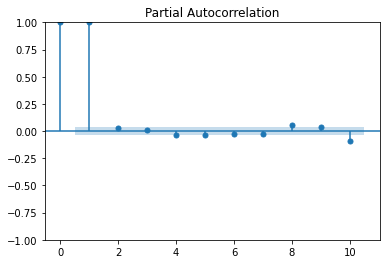

In [23]:
plot_pacf(data, lags=10)
plt.show()

## **<span> 5.6 Taking Auto-correlation Lag value Greater than 10%  </span>**

In [25]:
from statsmodels.tsa.stattools import pacf
pacf_value = pacf(data, nlags=20)
lag = 0
# collect lag values greater than 10% correlation 
for x in pacf_value:
    if x > 0.1:
        lag += 1
    else:
        break
print('Selected look_back (or lag = ): ', lag)

Selected look_back (or lag = ):  2


##  **<span> 5.7 Separate Input and Output  </span>**

In [26]:
train_X, train_y = create_dataset(train_data, lag)
test_X, test_y = create_dataset(test_data, lag)

In [27]:
print('Shape of train_X and train_y: ', train_X.shape, train_y.shape)
print('Shape of test_X and test_y: ', test_X.shape, test_y.shape)

Shape of train_X and train_y:  (2319, 2) (2319,)
Shape of test_X and test_y:  (578, 2) (578,)


##  **<span> 5.8 How Data Looks Like - Input and Output  </span>**

In [28]:
print(train_data[:20])            # original data
for x in range(len(train_X[:20])):
    print(test_X[x], test_y[x], )            # trainX and trainY after lookback

[[313.992    ]
 [314.446    ]
 [286.572    ]
 [260.936    ]
 [273.22     ]
 [285.3738   ]
 [295.8725   ]
 [284.4525   ]
 [289.5738   ]
 [274.533    ]
 [267.184    ]
 [268.3536677]
 [221.436    ]
 [172.1479   ]
 [210.5559   ]
 [205.816    ]
 [199.4914   ]
 [208.9892   ]
 [214.545    ]
 [210.5137   ]]
[56928.9723566  50004.76218314] 49972.79539837245
[50004.76218314 49972.79539837] 49913.26314398822
[49972.79539837 49913.26314399] 46780.90230468821
[49913.26314399 46780.90230469] 46585.06413538846
[46780.90230469 46585.06413539] 43780.82559782485
[46585.06413539 43780.82559782] 43091.04144756922
[43780.82559782 43091.04144757] 37287.39140242737
[43091.04144757 37287.39140243] 40437.73009625558
[37287.39140243 40437.73009626] 37339.63420134628
[40437.73009626 37339.63420135] 37520.31767547438
[37339.63420135 37520.31767547] 34977.527801962424
[37520.31767547 34977.52780196] 38642.4422973396
[34977.52780196 38642.44229734] 38210.80521759389
[38642.44229734 38210.80521759] 39406.93424411618

##  **<span> 5.9 Build a model  </span>**

In [30]:
# Fix random seed for reproducibility
# Thes seed value helps in initilizing random weights and biases to the neural network.  
np.random.seed(7)

In [33]:
# ML libraries
from keras.models import Sequential
from keras.layers.core import Dense, Activation
import keras

In [34]:
model = Sequential()
model.add(Dense(64, input_dim = lag, activation='relu', name= "1st_hidden"))
# model.add(Dense(64, activation='relu', name = '2nd_hidden'))
model.add(Dense(1, name = 'Output_layer', activation='linear'))
# model.add(Activation("linear", name = 'Linear_activation'))
model.compile(loss="mean_squared_error", optimizer="adam")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
1st_hidden (Dense)           (None, 64)                192       
_________________________________________________________________
Output_layer (Dense)         (None, 1)                 65        
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


2022-12-14 01:39:08.369313: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


# **<span> 5.10 Fit data to Model  </span>**

In [35]:
epoch_number = 100
batches = 64

history = model.fit(train_X, train_y, epochs = epoch_number, batch_size = batches, verbose = 1, shuffle=False, 
                    validation_split=0.1)

2022-12-14 01:39:25.780271: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
33/33 [==============================] - 1s 7ms/step - loss: 64709876.0000 - val_loss: 1995360640.0000
Epoch 2/100
33/33 [==============================] - 0s 2ms/step - loss: 34441764.0000 - val_loss: 1046440576.0000
Epoch 3/100
33/33 [==============================] - 0s 2ms/step - loss: 16572324.0000 - val_loss: 467938624.0000
Epoch 4/100
33/33 [==============================] - 0s 2ms/step - loss: 6126926.0000 - val_loss: 151478544.0000
Epoch 5/100
33/33 [==============================] - 0s 2ms/step - loss: 1520665.7500 - val_loss: 32810716.0000
Epoch 6/100
33/33 [==============================] - 0s 2ms/step - loss: 293894.0625 - val_loss: 6603733.0000
Epoch 7/100
33/33 [==============================] - 0s 2ms/step - loss: 128424.8125 - val_loss: 3491139.5000
Epoch 8/100
33/33 [==============================] - 0s 2ms/step - loss: 119438.9297 - val_loss: 3256096.7500
Epoch 9/100
33/33 [==============================] - 0s 2ms/step - loss: 119268.1406 - val_loss: 3242

# **<span> 5.11 Train and Validation Loss  </span>**

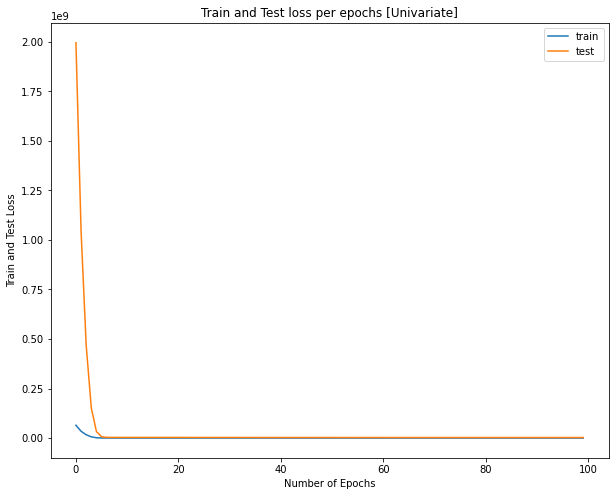

In [36]:
# plot history
plt.clf
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Number of Epochs')
plt.ylabel('Train and Test Loss')
plt.title('Train and Test loss per epochs [Univariate]')
plt.legend()
plt.show()

## **<span> 5.12 Make Prediction  </span>**

In [37]:
# Make prediction
testPredict = model.predict(test_X)
predicted_value = testPredict[:, 0]

## **<span> 5.13 Evaluation Metrics to Measure Performance  </span>**

* **<span> Mean Absolute Error </span>**

* **<span> Root Mean Squared Error</span>**


In [44]:
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error

def evaluate_forecast_results(actual, predicted):
    print('MAE : ', round(mae(actual, predicted), 2))
    print('RMSE: ', round(math.sqrt(mean_squared_error(actual,predicted)), 2))
    
    

In [45]:
evaluate_forecast_results(test_y, predicted_value)

MAE :  956.9
RMSE:  1395.05


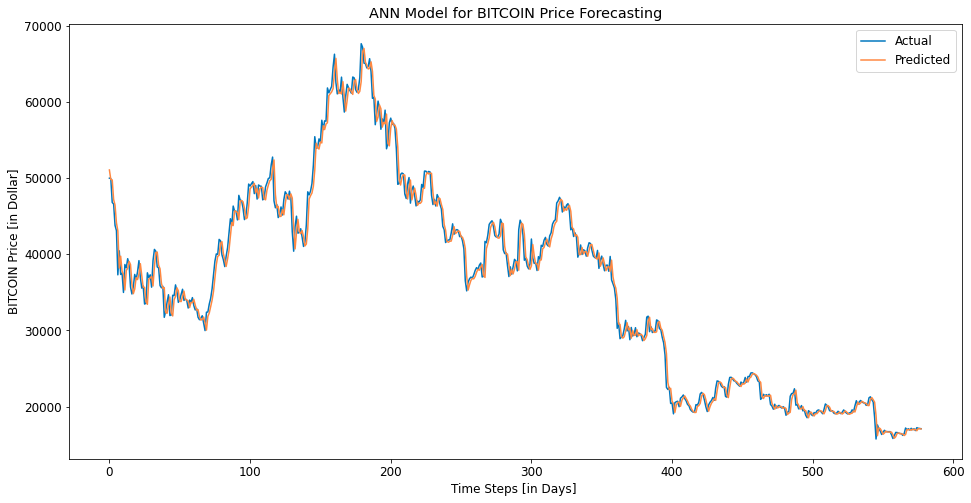

In [41]:
# Here we're plotting Test and Predicted data

plt.figure(figsize=(16, 8))
plt.rcParams.update({'font.size': 12})
plt.plot(test_y[:], '#0077be',label = 'Actual')
plt.plot(predicted_value, '#ff8841',label = 'Predicted')
plt.title('ANN Model for BITCOIN Price Forecasting')
plt.ylabel('BITCOIN Price [in Dollar]')
plt.xlabel('Time Steps [in Days] ')
plt.legend()
plt.show()